DKM - changed from original

# Experiment Configuration and Execution

In this tutorial we show how to configure and execute an experiment in OpenSBT to test an agent. We show the configuration of the experiment for testing a simplistic agent in a simplified simulator (no GPU required).

_Note: This example is meant for introducing OpenSBT. An application with a high fidelity simulation and a *real-world* SUT is provided [here](https://git.fortiss.org/opensbt/opensbt-core/-/blob/main/doc/jupyter/06_Example_CARLA.ipynb)._

## Toy Example

We refer to this example as Toy Example. The example contains an AEB agent and a pedestrian. Both actors move linear, while the pedestrian has a fixed trajectory and fixed velocity, the ego agent has a predefined path but can modify his velocity. That means, ego brakes when he detects other actors within a predefined distance. We want to test the AEB agent in violating the safety distance of 1m. For this we want to vary the initial velocities of both actors as well the orientation of the pedestrian crossing egos' lane.

In particlar, the pedestrian has a speed in the range of [0.2, 3] m/s, the ego [1, 10] m/s, while the orientation range is [0,180] degrees.

## Defining An Experiment

To define an experiment we need to instantiate [`ADASProblem`](https://git.fortiss.org/opensbt/opensbt-core/-/blob/main/problem/adas_problem.py). `ADASProblem` holds:

- the **scenario**, which can be e.g., an OpenSCENARIO file, or file of another format supported by simulator,
- the **search variables**, whose values are altered to produce (different) scenarios througout the search,
- the **search space**, represented by the lower and upper bounds as arrays,
- the **fitness function**, which evaluates how 'fit' a test case is,
- the **criticality function**, which represents the safety requirements/testing oracle,
- the **simulate function** to trigger the simulator via this function,
- the **simulator-related variables**, i.e., simulation time, sampling time, toggle for visualization.

_Note, that for now the SUT is triggered via the Simulater Interface, as we assume that the SUT is embedded into the simulator. We are working on an update where the SUT can be defined uncoupled from the simulator._

In [ ]:
# DKM - skipped
cd opensbt-core

In [1]:
# DKM - only run this ONCE per kernel start. Jupyter has issues with figuring out current file's directory
# https://note.nkmk.me/en/python-script-file-path/

import pymoo
import os

# Define the current directory
current_dir = os.getcwd()
print(current_dir)

# Home directory is two up from current directory
home_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir))

os.chdir(home_dir)
print(os.getcwd())

# DKM - added prefix "opensbt." to imports, assuming home directory is opensbt-core

from opensbt.model_ga.individual import IndividualSimulated
pymoo.core.individual.Individual = IndividualSimulated

from opensbt.model_ga.population import PopulationExtended
pymoo.core.population.Population = PopulationExtended

from opensbt.model_ga.result  import SimulationResult
pymoo.core.result.Result = SimulationResult

from opensbt.model_ga.problem import SimulationProblem
pymoo.core.problem.Problem = SimulationProblem

from opensbt.algorithm.nsga2_optimizer import NsgaIIOptimizer
from opensbt.experiment.search_configuration import DefaultSearchConfiguration

import os
from opensbt.evaluation.fitness import *
from opensbt.problem.adas_problem import ADASProblem
from opensbt.problem.pymoo_test_problem import PymooTestProblem
from opensbt.experiment.experiment_store import *
from opensbt.algorithm.algorithm import *
from opensbt.evaluation.critical import *
from opensbt.simulation.dummy_simulation import DummySimulator

c:\Users\dmarson\Documents\Projects\Marson_PhD\opensbt-core-fork\docs\jupyter
c:\Users\dmarson\Documents\Projects\Marson_PhD\opensbt-core-fork


In [2]:
problem = ADASProblem(
                      problem_name="DummySimulatorProblem",
                      scenario_path="scenarios/dummy_scenario.xosc",
                      xl=[0, 1, 0, 0.2],
                      xu=[180, 10,180, 3],
                      simulation_variables=[
                          "orientation_ego",
                          "velocity_ego",
                          "orientation_ped",
                          "velocity_ped"],
                      fitness_function=FitnessMinDistanceVelocity(),
                      critical_function=CriticalAdasDistanceVelocity(),
                      simulate_function=DummySimulator.simulate,
                      simulation_time=10,
                      sampling_time=0.25
                      )

We have two options to execute the testing experiment: using the console or using the code directly. 

## Experiment Execution (Code)

To start search without console, we instantiate the search algorithms `Optimizer` and call its `run` method to start the search. When the search has finished, we write the results by calling an output method (line 9). The results will be written in the default folder name `results`, if no folder name is passed.

In [3]:
# import pymoo
# DKM - added prefix "opensbt." to imports, assuming home directory is opensbt-core

from opensbt.model_ga.individual import IndividualSimulated
pymoo.core.individual.Individual = IndividualSimulated

from opensbt.model_ga.population import PopulationExtended
pymoo.core.population.Population = PopulationExtended

from opensbt.model_ga.result  import SimulationResult
pymoo.core.result.Result = SimulationResult

from opensbt.model_ga.problem import SimulationProblem
pymoo.core.problem.Problem = SimulationProblem

from opensbt.algorithm.nsga2_optimizer import NsgaIIOptimizer

from opensbt.utils import log_utils

log_utils.setup_logging("./log.txt")

# Set search configuration
config = DefaultSearchConfiguration()
config.n_generations = 50
config.population_size = 20

# Instantiate search algorithm
optimizer = NsgaIIOptimizer(
                            problem=problem,
                            config= config)

# Run search
res = optimizer.run()

# Write results
res.write_results(params = optimizer.parameters)

2024-05-02 15:14:31,854 INFO     Logging setup. Writing to file:  ./log.txt
2024-05-02 15:14:31,896 INFO     Running evaluation number 1
2024-05-02 15:14:32,005 INFO     Running evaluation number 2
2024-05-02 15:14:32,033 INFO     Running evaluation number 3
2024-05-02 15:14:32,062 INFO     Running evaluation number 4
2024-05-02 15:14:32,089 INFO     Running evaluation number 5
2024-05-02 15:14:32,171 INFO     Running evaluation number 6


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       20 |      5 |             - |             -
     2 |       40 |      4 |  2.1395471123 |         nadir
     3 |       60 |      3 |  0.0442800265 |         ideal
     4 |       80 |      5 |  0.1792162588 |         ideal
     5 |      100 |      6 |  0.0102245682 |         ideal


2024-05-02 15:14:32,203 INFO     Running evaluation number 7
2024-05-02 15:14:32,243 INFO     Running evaluation number 8
2024-05-02 15:14:32,274 INFO     Running evaluation number 9
2024-05-02 15:14:32,308 INFO     Running evaluation number 10
2024-05-02 15:14:32,341 INFO     Running evaluation number 11
2024-05-02 15:14:32,368 INFO     Running evaluation number 12


     6 |      120 |      6 |  0.0988627517 |         nadir
     7 |      140 |      7 |  0.0121075250 |             f
     8 |      160 |      7 |  0.0591650765 |         nadir
     9 |      180 |      6 |  0.0078062287 |             f
    10 |      200 |      5 |  6.7077050946 |         nadir
    11 |      220 |      7 |  0.8101132987 |         nadir


2024-05-02 15:14:32,404 INFO     Running evaluation number 13
2024-05-02 15:14:32,437 INFO     Running evaluation number 14
2024-05-02 15:14:32,474 INFO     Running evaluation number 15
2024-05-02 15:14:32,515 INFO     Running evaluation number 16
2024-05-02 15:14:32,545 INFO     Running evaluation number 17
2024-05-02 15:14:32,578 INFO     Running evaluation number 18


    12 |      240 |      6 |  0.0069179447 |         nadir
    13 |      260 |      7 |  0.0364459935 |         nadir
    14 |      280 |      8 |  0.0470958862 |         nadir
    15 |      300 |      8 |  0.0068089618 |             f
    16 |      320 |     10 |  0.1338485400 |         nadir
    17 |      340 |     12 |  0.0023064136 |             f
    18 |      360 |     10 |  0.0049010929 |         ideal


2024-05-02 15:14:32,613 INFO     Running evaluation number 19
2024-05-02 15:14:32,645 INFO     Running evaluation number 20
2024-05-02 15:14:32,675 INFO     Running evaluation number 21
2024-05-02 15:14:32,768 INFO     Running evaluation number 22
2024-05-02 15:14:32,801 INFO     Running evaluation number 23
2024-05-02 15:14:32,829 INFO     Running evaluation number 24


    19 |      380 |     10 |  0.0010546432 |             f
    20 |      400 |      9 |  0.0032129061 |             f
    21 |      420 |     10 |  0.0185569894 |             f
    22 |      440 |     11 |  0.8958063505 |         nadir
    23 |      460 |     13 |  0.0027107237 |             f


2024-05-02 15:14:32,869 INFO     Running evaluation number 25
2024-05-02 15:14:32,900 INFO     Running evaluation number 26
2024-05-02 15:14:32,930 INFO     Running evaluation number 27
2024-05-02 15:14:32,962 INFO     Running evaluation number 28
2024-05-02 15:14:32,992 INFO     Running evaluation number 29
2024-05-02 15:14:33,025 INFO     Running evaluation number 30
2024-05-02 15:14:33,063 INFO     Running evaluation number 31


    24 |      480 |     13 |  0.0074624403 |         nadir
    25 |      500 |     17 |  0.0126704291 |         nadir
    26 |      520 |     18 |  0.0376049046 |         nadir
    27 |      540 |     19 |  0.0001893624 |             f
    28 |      560 |     18 |  0.0493439132 |         nadir
    29 |      580 |     19 |  0.0116038567 |             f
    30 |      600 |     17 |  0.0293676007 |         nadir


2024-05-02 15:14:33,107 INFO     Running evaluation number 32
2024-05-02 15:14:33,140 INFO     Running evaluation number 33
2024-05-02 15:14:33,175 INFO     Running evaluation number 34
2024-05-02 15:14:33,204 INFO     Running evaluation number 35
2024-05-02 15:14:33,239 INFO     Running evaluation number 36


    31 |      620 |     17 |  0.2591862390 |         nadir
    32 |      640 |     19 |  0.0043054532 |         nadir
    33 |      660 |     17 |  0.0001617808 |             f
    34 |      680 |     16 |  0.0016879711 |             f
    35 |      700 |     16 |  0.0041361723 |             f
    36 |      720 |     17 |  0.0034428959 |             f


2024-05-02 15:14:33,346 INFO     Running evaluation number 37
2024-05-02 15:14:33,375 INFO     Running evaluation number 38
2024-05-02 15:14:33,406 INFO     Running evaluation number 39
2024-05-02 15:14:33,435 INFO     Running evaluation number 40
2024-05-02 15:14:33,464 INFO     Running evaluation number 41
2024-05-02 15:14:33,493 INFO     Running evaluation number 42
2024-05-02 15:14:33,522 INFO     Running evaluation number 43
2024-05-02 15:14:33,557 INFO     Running evaluation number 44


    37 |      740 |     13 |  2.1030551256 |         nadir
    38 |      760 |     13 |  0.000000E+00 |             f
    39 |      780 |     13 |  0.0297765069 |         nadir
    40 |      800 |     14 |  0.0190736444 |         nadir
    41 |      820 |     13 |  0.0384757579 |         nadir
    42 |      840 |     13 |  0.0027586368 |             f
    43 |      860 |     13 |  1.6885613358 |         nadir


2024-05-02 15:14:33,596 INFO     Running evaluation number 45
2024-05-02 15:14:33,637 INFO     Running evaluation number 46
2024-05-02 15:14:33,670 INFO     Running evaluation number 47
2024-05-02 15:14:33,697 INFO     Running evaluation number 48
2024-05-02 15:14:33,727 INFO     Running evaluation number 49
2024-05-02 15:14:33,758 INFO     Running evaluation number 50
2024-05-02 15:14:33,785 INFO     =====[NSGA2] Writing results to: 


    44 |      880 |     14 |  0.0015209229 |             f
    45 |      900 |     12 |  0.2261354564 |         nadir
    46 |      920 |     12 |  0.0015308245 |             f
    47 |      940 |     13 |  0.0034586673 |             f
    48 |      960 |     13 |  0.0039293804 |             f
    49 |      980 |     11 |  0.0002920879 |             f
    50 |     1000 |     11 |  0.0063294110 |             f


2024-05-02 15:14:33,787 INFO     Save_folder created: c:\Users\dmarson\Documents\Projects\Marson_PhD\opensbt-core-fork\results\DummySimulatorProblem\NSGA2\02-05-2024_15-14-33\
2024-05-02 15:14:33,788 INFO     c:\Users\dmarson\Documents\Projects\Marson_PhD\opensbt-core-fork\results\DummySimulatorProblem\NSGA2\02-05-2024_15-14-33\
2024-05-02 15:14:39,731 INFO     Objective Space: c:\Users\dmarson\Documents\Projects\Marson_PhD\opensbt-core-fork\results\DummySimulatorProblem\NSGA2\02-05-2024_15-14-33\objective_space\iteration_49\Min distance_Velocity at min distance.png
2024-05-02 15:14:39,921 INFO     ['Number Critical Scenarios (duplicate free)', 61]
2024-05-02 15:14:39,922 INFO     ['Number All Scenarios (duplicate free)', 268]
2024-05-02 15:14:39,922 INFO     ['Ratio Critical/All scenarios (duplicate free)', '0.23']
2024-05-02 15:14:44,010 INFO     Writing 2D scenario visualization in .gif ...


We can then for instance inspect the visualization of test cases that has been found during search. Note, that visualizations of the "fitness"-optimal scenarios are stored in the "gif" folder.

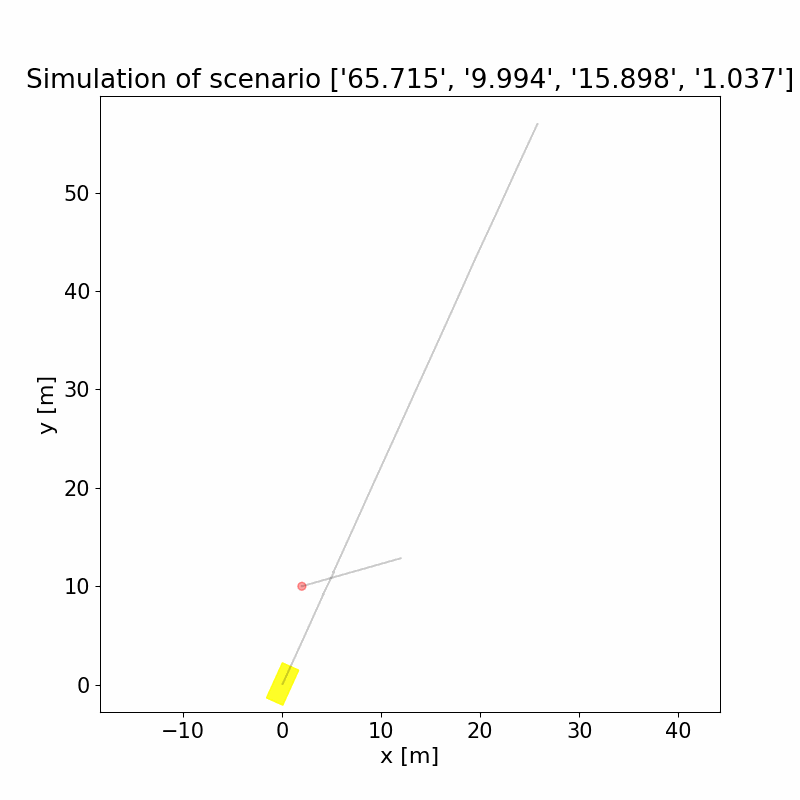

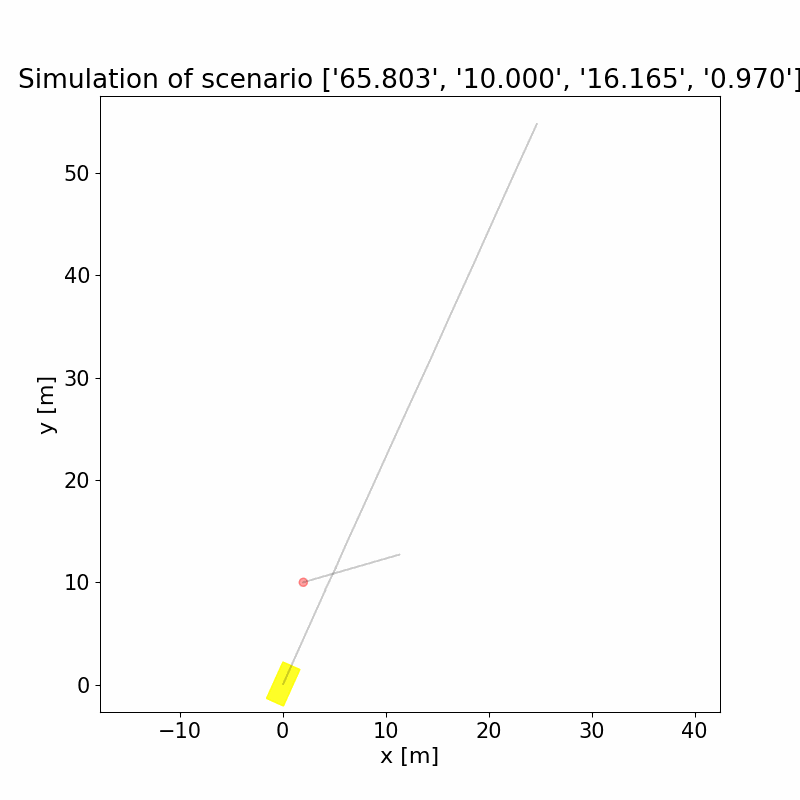

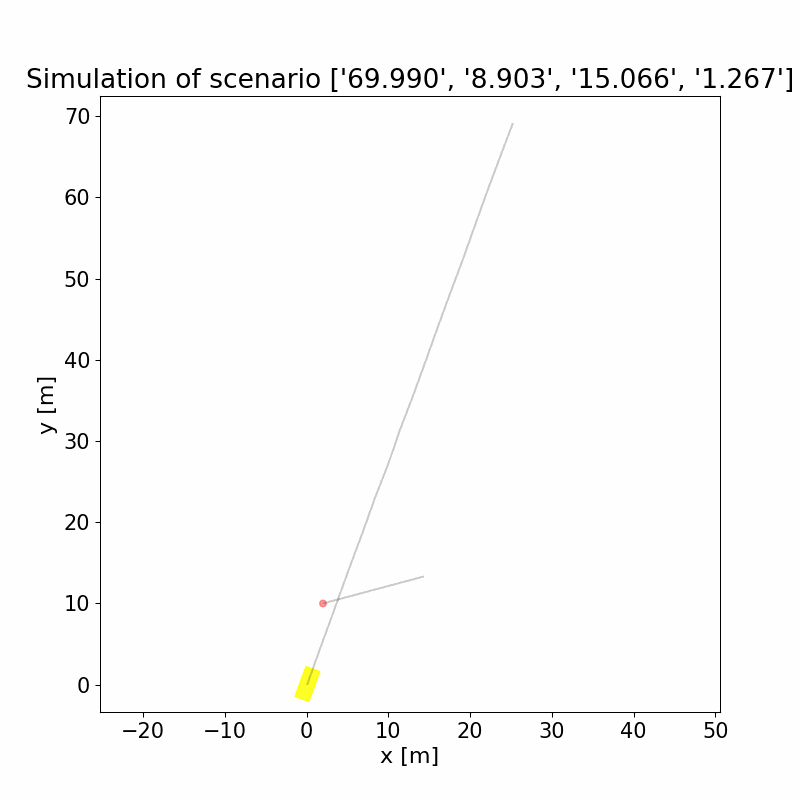

In [4]:
import pandas as pd
from pathlib import Path
import os

exp_folder = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/"
paths = sorted(Path(exp_folder).iterdir(), key=os.path.getmtime)
results_path = str(paths[-1])

from IPython.display import Image
import os

n = 4 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(open(fpath,'rb').read(), width=300, height=300)
      display(img)
      i = i+1

## Experiment Execution (Console)

To start the search through the console we need to create an `Experiment` instance. The experiment instance receives the following inputs:

- the experiment name (type `str`)
- the created problem (type `ADASProblem`) 
- the search algorithm (type `AlgorithmType`)
- the search configuration (type `SearchConfiguration`)

Note, that the algorithm that is passed is an enumeration value which need to be registed beforehand via the `algorithm.py` script.

```python
from experiment.experiment import Experiment
from algorithm.algorithm import AlgorithmType
from experiment.search_configuration import DefaultSearchConfiguration

experiment = Experiment(name="5",
                        problem=problem,
                        algorithm=AlgorithmType.NSGAII,
                        search_configuration=DefaultSearchConfiguration())
```

Then we register the experiment so that we can use it later via console.

```python
from experiment.experiment_store import experiments_store
experiments_store.register(experiment)
```

To start search via console we run the experiment with the name "5":

We can change the experiment parameters, such e.g., lower and upper bounds of the search parameters, the search time, iteration size or population size by using flags. In the following execution, we restrict the search by selecting a maximal angle of 90 degrees and use only 10 iterations for the genetic operations.

In [ ]:
!python run.py -e 5 -min 0 1 90 0.2 -max 90 10 90 3 \
-m  "orientation_ped" "velocity_ped" "orientation_ped" "velocity_ped" -i 10

We can then inspect some of the optimal test inputs that have been found:

In [ ]:
import pandas as pd
from pathlib import Path
import os

exp_folder = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/"
paths = sorted(Path(exp_folder).iterdir(), key=os.path.getmtime)
results_path = str(paths[-1])

from IPython.display import Image
import os

n = 4 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(open(fpath,'rb').read(), width=300, height=300)
      display(img)
      i = i+1

## Flags

The complete list of flags is provided below.

```
 -h, --help            show this help message and exit
  -e EXP_NUMBER         Name of existing experiment to be used. (show all experiments via -info)].
  -i N_GENERATIONS      Number of generations to perform.
  -n SIZE_POPULATION    The size of the initial population of scenario candidates.
  -a ALGORITHM          The algorithm to use for search (Number registered via AlgorithmType)
  -t MAXIMAL_EXECUTION_TIME
                        The time to use for search.
  -f SCENARIO_PATH      The path to the scenario description file.
  -min VAR_MIN [VAR_MIN ...]
                        The lower bound of each search parameter.
  -max VAR_MAX [VAR_MAX ...]
                        The upper bound of each search parameter.
  -m DESIGN_NAMES [DESIGN_NAMES ...]
                        The names of the variables to modify.
  -o RESULTS_FOLDER     The name of the folder where the results of the search are stored (default: /results/single/)
  -v                    Whether to use the simuator's visualization. This feature is useful for debugging and demonstrations, however it reduces the search performance.
  -info                 Names of all defined experiments.
```
